<a href="https://colab.research.google.com/github/anshudhanshu/Face-Recognition-Drowsiness-Detection/blob/master/Face_Recognition_using_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 43kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=897e190f5829ba6f6237b0f50c6cae77d6acf4d34e850e84e3dc4bead3da50e4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
!mkdir known
!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

In [ ]:
!mkdir unknown
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

Processing 1.jpg
[False, False]
Processing 2.jpg
[False, False]
Processing 3.jpg
[False, False]
Processing 4.jpg


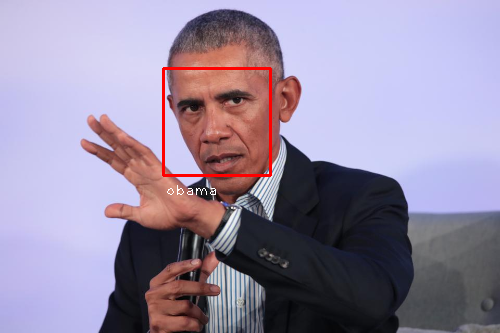

[True, False]
Processing 5.jpg


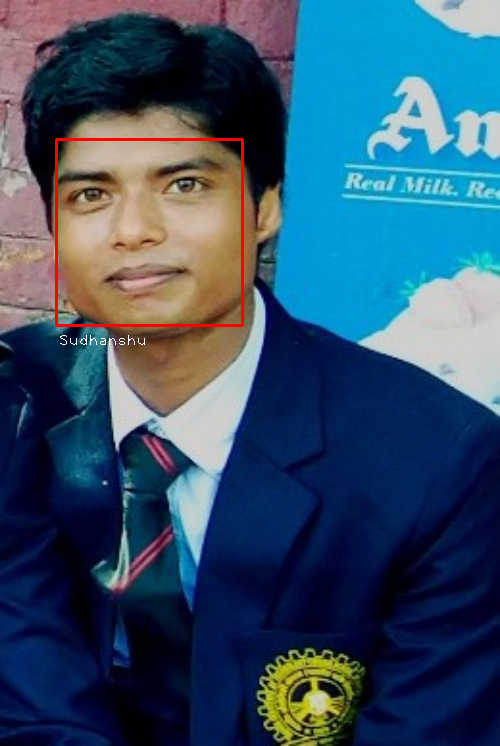

[False, True]


In [40]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):

  '''
    This function reads the image and resize them. Takes path of the images as argument 
    and returns the resized image.
  '''
  img = cv2.imread(path)
  # print(img)
  (h, w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))


known_encodings = []    # list of encodings of all known images
known_names = []        # names of all known images
known_dir = 'known'        # directory name

for file in os.listdir(known_dir)[0:2]:
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])





unknown_dir = 'unknown'
file_name = ['1.jpg','2.jpg','3.jpg','4.jpg','5.jpg']
for file in file_name:
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # print(face_recognition.face_distance(known_encodings, img_enc))

    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)
            

    print(results)



In [37]:
print(os.listdir(unknown_dir))

# img = read_img(known_dir + '/bill.jpg')
# # print(img)
# img_enc = face_recognition.face_encodings(img)[0]

['4.jpg', '2.jpg', '.ipynb_checkpoints', '3.jpg', '1.jpg', '5.jpg']
